# PRÁCTICA 4: Interpolación: El fenómeno de Runge
## Leandro Jorge Fernández Vega

El objetivo final de esta práctica es construir el gráfico que ilustra el fenómeno de Runge, en el que
se muestra como al aumentar el número de puntos de interpolación puede ocurrir que la gráfica del
polinomio de interpolación no se aproxime a la gráfica de la función interpolada.

En el gráfico se incluyen la función interpolada f(x) =
1/(1 + x^2) y las gráficas de los polinomios de
grados 6 y 14 que interpolan a f en puntos equiespaciados del intervalo [-5,5].

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Ejercicio 1: Construya un array que contenga un conjunto de n puntos equiespaciados del intervalo [-5,5].**

In [2]:
def Puntos_Equidistantes(n):
    
    """Esta función construye un array con n puntos equidistantes del intervalo [-5,5]."""
    
    x=np.zeros(n+1)
    for k in range(n+1):
        x[k]=-5+(10*k)/n
        
    return x
    

In [3]:
#Construcción del vector de puntos entre -5 y 5 con saltos de 0.1.
p_interpolacion=Puntos_Equidistantes(100)

**Ejercicio 2: Construya un array que contenga las imágenes mediante f de los puntos anteriores.**

In [4]:
def f(x):
    
    """Esta es la función Función 1/(1+x**2)."""
    
    return 1/(1+x**2)

In [5]:
#Contrucción del vector de imágenes a partir de x.
y=f(p_interpolacion)

**Ejercicio 3: Construya una función en Python que a partir de los arrays anteriores calcule la tabla de diferencias divididas. Dicha función debe devolver solo los coeficientes del polinomio de interpolación en su forma de Newton.**

In [6]:
def Dif_Divididas(x,y):
    
    """Esta función calcula la tabla de diferencias divididas a partir de unos puntos de interpolación y sus imágenes 
                y extrae los coeficientes necesarios para construir el polinomio de interpolación."""
    
    
    n=np.size(x)
    tabla=np.zeros([n,n])
    
    #Guardamos las imágenes  
    for i in range (n):            
            tabla[i][0]=y[i]
            
    for j in range (1,n):
        for i in range (j,n):
            tabla[i][j] = (tabla[i][j-1] - tabla[i-1][j-1])/(x[i]-x[i-j])

    #Extraemos los coeficientes que nos interesan.
    coeficientes=np.zeros(n)   
    for i in range (n):
        coeficientes[i]=tabla[i][i]
    
    return coeficientes

**Ejercicio 4: Construya una función en Python que a partir del array de puntos y del array de coeficientas
proporcione el valor del polinomio interpolación de Newton en un punto x.**

In [7]:
def Pol_Newton(x,x_0,coeficientes):
    
    """Esta función evalúa en el punto x el polinomio que interpola el vector de puntos x_0, y dados los coeficientes
                                obtenidos en la tabla de diferencias divididas."""
    
    
    n=np.size(x_0)
    polinomio=0
    acumulacion=1
    
    for i in range (n):
        polinomio+=coeficientes[i]*acumulacion
        acumulacion=1
        for j in range(i+1):
            acumulacion*=(x-x_0[j])

    return polinomio

**Ejercicio 5: Utilice la función anterior para construir la gráfica pedida.**

In [8]:
#Construcción del polinomio de interpolación de grado 6.
x_6=Puntos_Equidistantes(6)
coeficientes_6=Dif_Divididas(x_6,f(x_6))
n=np.size(p_interpolacion)
pol_6=np.zeros(n)
j=0
for i in p_interpolacion:
    pol_6[j]=Pol_Newton(i,x_6,coeficientes_6)
    j=j+1

#Construcción del polinomio de interpolación de grado 14.
x_14=Puntos_Equidistantes(14)
coeficientes_14=Dif_Divididas(x_14,f(x_14))
pol_14=np.zeros(n)
j=0
for i in p_interpolacion:
    pol_14[j]=Pol_Newton(i,x_14,coeficientes_14)
    j=j+1

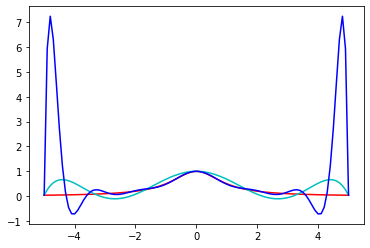

In [9]:
#Esbozado de las gráficas.
plt.plot(p_interpolacion,y,'r')
plt.plot(p_interpolacion,pol_6,'c')
plt.plot(p_interpolacion,pol_14,'b')